<a href="https://colab.research.google.com/github/allandevbr92/MyResume/blob/master/analiseEnem2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Enem2022/MICRODADOS_ENEM_2022.csv', encoding='ISO-8859-1', delimiter=';')

#Nota Media Redação e Disciplinas - Masculino X Feminino

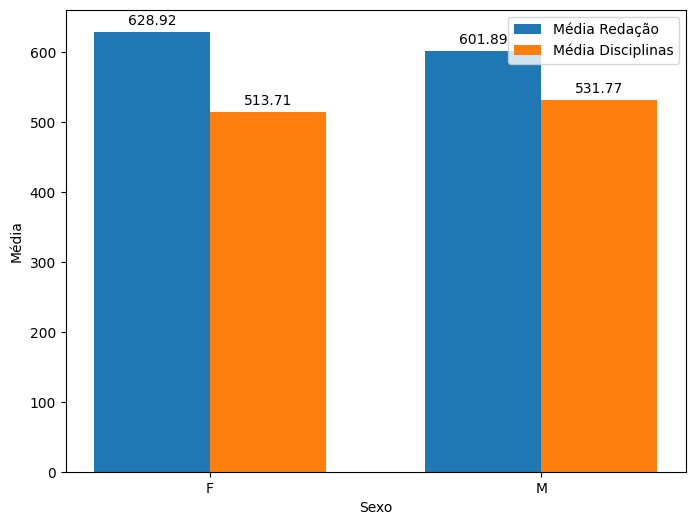

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você já tenha carregado os dados em um dataframe chamado 'df'

# Calculando as médias de redação e médias gerais por sexo
media_redacao = df.groupby('TP_SEXO')['NU_NOTA_REDACAO'].mean()
media_disciplinas = df.groupby('TP_SEXO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean().mean(axis=1)

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
x = range(len(media_redacao))
bar_width = 0.35

# Médias de Redação
rects1 = ax.bar(x, media_redacao, bar_width, label='Média Redação')
# Médias Gerais
rects2 = ax.bar([i + bar_width for i in x], media_disciplinas, bar_width, label='Média Disciplinas')

# Definindo os rótulos dos eixos x e y
ax.set_xlabel('Sexo')
ax.set_ylabel('Média')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(media_redacao.index)

# Adicionando os valores das médias nas colunas
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Adicionando uma legenda
ax.legend()

# Exibindo o gráfico
plt.show()




# Nota Média Geral - Masculino X Feminino


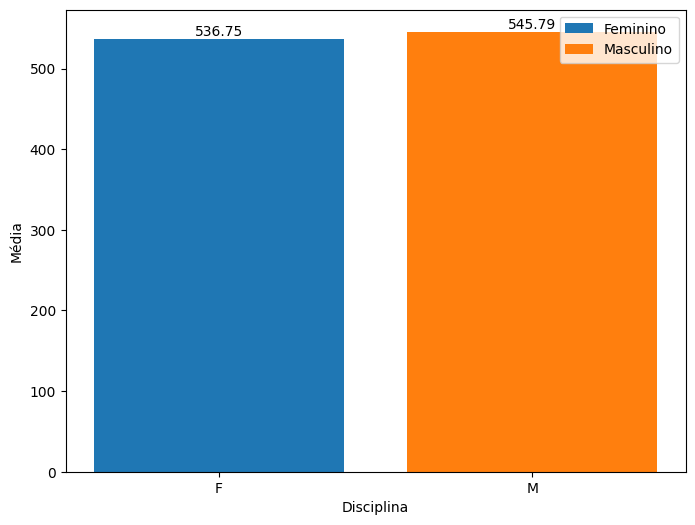

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você já tenha carregado os dados em um dataframe chamado 'df'

# Calculando as médias de redação e médias gerais por sexo
media_geral = df.groupby('TP_SEXO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean().mean(axis=1)

# Criando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(8, 6))

# Definindo as cores para cada disciplina
cores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Convertendo as médias para uma matriz numpy
medias = np.array([media_geral['F'], media_geral['M']])

# Plotando as barras empilhadas para cada disciplina
barras = ax.bar(media_geral.index, medias, label=['Feminino', 'Masculino'], color=cores)

# Adicionando rótulos nas barras
for i, barra in enumerate(barras):
    height = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, height,
            f"{height:.2f}", ha='center', va='bottom')

# Definindo os rótulos dos eixos x e y
ax.set_xlabel('Disciplina')
ax.set_ylabel('Média')

# Adicionando uma legenda
ax.legend()

# Exibindo o gráfico
plt.show()


#Média da Nota de Redação X Tipo de Escola

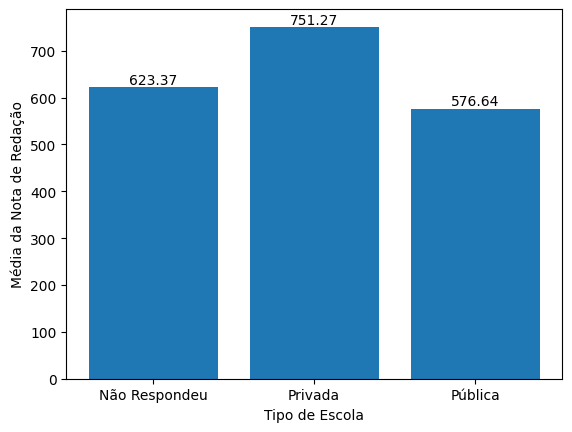

In [24]:
import matplotlib.pyplot as plt

# Calculando a média da nota de redação por tipo de escola
media_redacao_por_escola = df.groupby('TP_ESCOLA')['NU_NOTA_REDACAO'].mean()

# Configurando os dados para o gráfico
escolas = media_redacao_por_escola.index
medias = media_redacao_por_escola.values

# Criando o gráfico de colunas
fig, ax = plt.subplots()
ax.bar(escolas, medias)

# Configurando os rótulos dos eixos x e y
ax.set_xlabel('Tipo de Escola')
ax.set_ylabel('Média da Nota de Redação')

# Adicionando os valores das médias nas colunas
for i, media in enumerate(medias):
    ax.annotate(f"{media:.2f}", (escolas[i], media), ha='center', va='bottom')

# Exibindo o gráfico
plt.show()




#Média das Disciplinas (exceto Redação) X Tipo de Escola

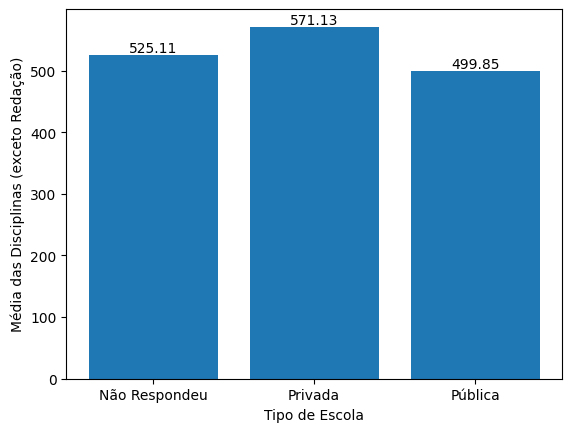

In [25]:
import matplotlib.pyplot as plt

# Calculando a média das disciplinas sem a redação por tipo de escola
media_disciplinas_por_escola = df.groupby('TP_ESCOLA')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean().mean(axis=1)

# Configurando os dados para o gráfico
escolas = media_disciplinas_por_escola.index
medias = media_disciplinas_por_escola.values

# Criando o gráfico de colunas
fig, ax = plt.subplots()
ax.bar(escolas, medias)

# Configurando os rótulos dos eixos x e y
ax.set_xlabel('Tipo de Escola')
ax.set_ylabel('Média das Disciplinas (exceto Redação)')

# Adicionando os valores das médias nas colunas
for i, media in enumerate(medias):
    ax.annotate(f"{media:.2f}", (escolas[i], media), ha='center', va='bottom')

# Exibindo o gráfico
plt.show()
